## <a id = "link1"></a> Import Libraries and Load Dataset

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_excel('Tourism.xlsx',sheet_name=1)
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.shape

(4888, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [6]:
df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [7]:
#Analyzing the distribution of the various attribute
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [8]:
df.nunique() # Number of unique values in a column

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

In [9]:
#we can drop customer id 
df.head(100)
#df.drop(columns=['CustomerID'], inplace=True)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200095,0,54.0,Self Enquiry,1,8.0,Large Business,Female,2,3.0,Standard,3.0,Divorced,1.0,0,4,1,0.0,Senior Manager,28549.0
96,200096,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
97,200097,0,NaN,Company Invited,3,10.0,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,2,1,0.0,Manager,NaN
98,200098,0,58.0,Self Enquiry,3,16.0,Small Business,Male,2,3.0,Super Deluxe,3.0,Single,1.0,0,3,1,1.0,AVP,28872.0


#EDA
Univariate Analysis

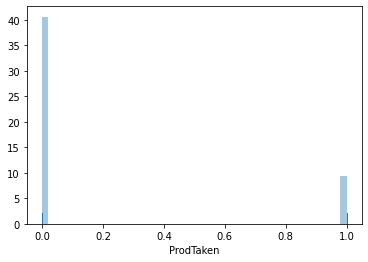

we can see there are very less number of customers who took the product


In [10]:
#sns.set({'figure.figsize': (8,6)})
sns.distplot(df['ProdTaken'], kde=True,rug=True);
#pd.value_counts(df['ProdTaken']).plot(kind="bar")
plt.show()
print("we can see there are very less number of customers who took the product")

Follows normal distribution curve


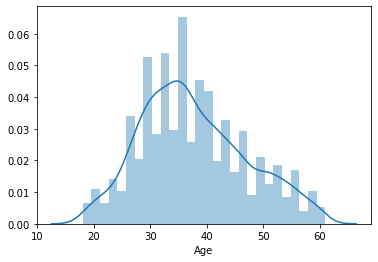

In [11]:
#sns.set({'figure.figsize': (8,6)})
sns.distplot(df['Age'], kde=True,rug=False);
print("Follows normal distribution curve")

most customers are with monthlyincome between 20000 to 30000


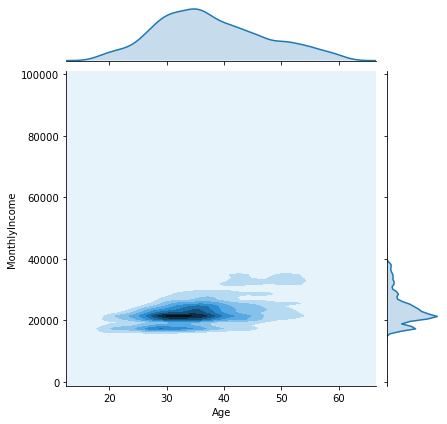

In [12]:
#bivariate
sns.jointplot(data=df, x="Age",y="MonthlyIncome",kind="kde")
print("most customers are with monthlyincome between 20000 to 30000")

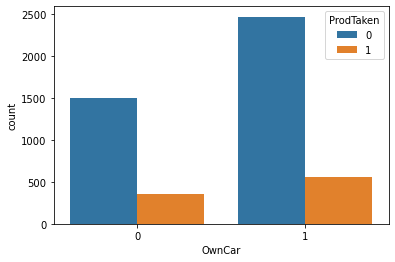

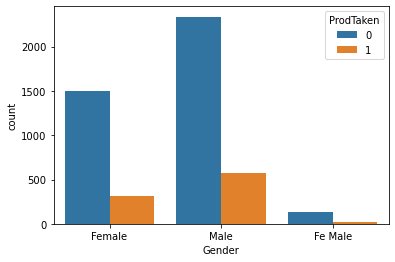

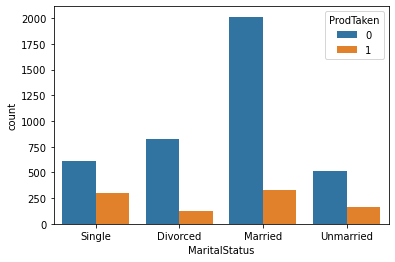

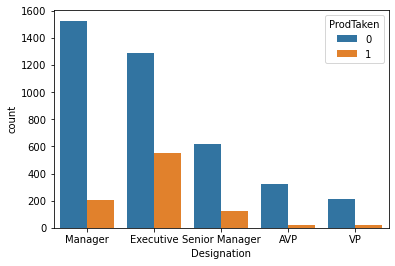

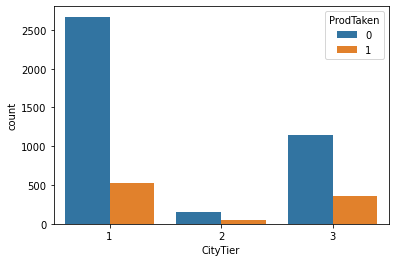

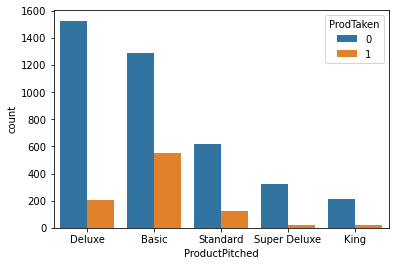

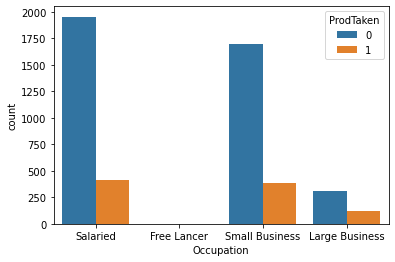

In [13]:
#Bivariate analysis
for i in ['OwnCar', 'Gender', 'MaritalStatus','Designation','CityTier', 'ProductPitched','Occupation']:
    sns.countplot(x=i, hue="ProdTaken", data=df)
    plt.show()

Insights:
Customers with Married showed more interest in the products.
Customers in Executive posiitons showed more interest. 
Salaried and Small Buisness customers have also shown more interest.
Most of the customers have pitched more to Basic package 
Age Group between 25 and 45 have more potential. 

Data Preprocessing

In [14]:
df =df.fillna(df.mean())
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact              25
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisited       0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisited     0
Designation                 0
MonthlyIncome               0
dtype: int64

In [15]:
#Type of contact is either self inquiry or company have invited. in case of blank values, we dont know what data to put in.
#It is to the benefit of the company to invite customers.
df['TypeofContact'].fillna(value='Company Invited', inplace = True)
df.isnull().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [16]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4888 non-null   float64
 3   TypeofContact            4888 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4888 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4888 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4888 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4888 non-null   float64
 14  Passport                

In [18]:
#df = df.dropna()
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.000000,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.000000,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.000000,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.000000,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.000000,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   int64   
 2   Age                      4888 non-null   float64 
 3   TypeofContact            4888 non-null   category
 4   CityTier                 4888 non-null   int64   
 5   DurationOfPitch          4888 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   int64   
 9   NumberOfFollowups        4888 non-null   float64 
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4888 non-null   float64 
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4888 non-null   float64 
 14  Passport

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.622265,9.098418,18.0,31.00,37.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.490835,8.297971,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.708445,0.997882,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.581037,0.795883,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.236521,1.822342,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [21]:
df = pd.get_dummies(df, drop_first=True)
df.dtypes
df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,...,0,0,0,0,1,0,0,1,0,0
1,200001,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,...,0,0,0,0,0,0,0,1,0,0
2,200002,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,...,0,0,0,0,1,0,1,0,0,0
3,200003,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,...,0,0,0,0,0,0,1,0,0,0
4,200004,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
#Dropping Customer Id
df.drop(columns=['CustomerID'], inplace=True)
df

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,4.0,2.0,1,1,...,0,0,0,0,0,1,0,1,0,0
4884,1,28.000000,1,31.0,4,5.0,3.0,3.0,1,3,...,0,0,0,0,1,0,1,0,0,0
4885,1,52.000000,3,17.0,4,4.0,4.0,7.0,0,1,...,0,1,0,1,0,0,0,0,1,0
4886,1,19.000000,3,16.0,3,4.0,3.0,3.0,0,5,...,0,0,0,0,1,0,1,0,0,0


Data Modelling:

In [23]:
X = df.drop("ProdTaken" , axis=1)
y = df.pop("ProdTaken")

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [25]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("f1 score on test set: ", f1_score(pred_test,y_test))
    
    return score_list # returning the list with train and test scores

Bagging Classifier

In [27]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [28]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9953230049693073
Accuracy on test set :  0.9113837764144512
Recall on training set :  0.9751552795031055
Recall on test set :  0.6195652173913043
Precision on training set :  1.0
Precision on test set :  0.8724489795918368
f1 score on test set:  0.7245762711864406


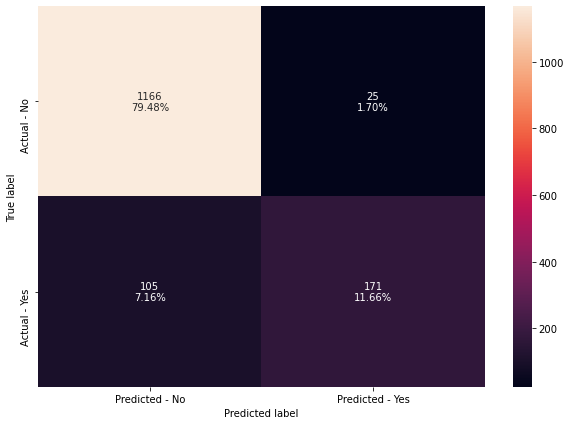

In [29]:
make_confusion_matrix(bagging_estimator,y_test)

In [30]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [31]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)


Accuracy on training set :  1.0
Accuracy on test set :  0.9100204498977505
Recall on training set :  1.0
Recall on test set :  0.572463768115942
Precision on training set :  1.0
Precision on test set :  0.9186046511627907
f1 score on test set:  0.7053571428571429


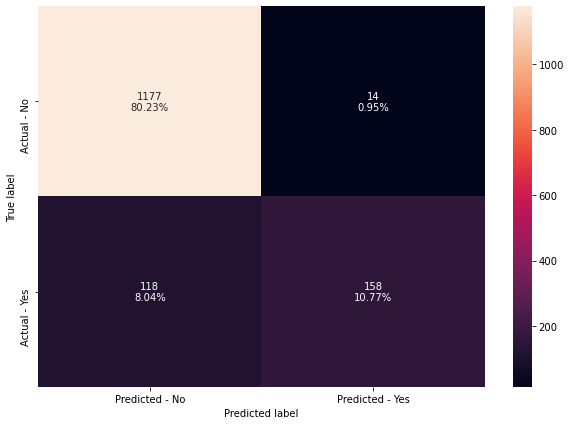

In [32]:
make_confusion_matrix(rf_estimator,y_test)

In [33]:
# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
#Using above defined function to get accuracy, recall and precision on train and test set
decision_tree_score=get_metrics_score(decision_tree_classifier)

Accuracy on training set :  1.0
Accuracy on test set :  0.8902522154055896
Recall on training set :  1.0
Recall on test set :  0.6630434782608695
Precision on training set :  1.0
Precision on test set :  0.7290836653386454
f1 score on test set:  0.6944971537001897


Bagging Model performance:
Based on the above three different classifiers. 
1. Accuracy is better in Random Forest when compared to other two.
2. Recall score seems to be better in Decision Tree classifier but Accuracy is lower than the Random Forest and Bagging Classifier.

We can tune using HyperParameters both Bagging classifier and Random Classifier and check the model performance. 

HyperParameter Tuning
Bagging Classifier:

In [35]:
   
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [36]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9229720518064076
Recall on training set :  0.9984472049689441
Recall on test set :  0.6521739130434783
Precision on training set :  1.0
Precision on test set :  0.9137055837563451
f1 score on test set:  0.7610993657505285


Bagging Classifier have done better with further tuning because the Recall score and Accuracy are better. 
Random Forest Classifier may do better with hyper parameters.


Random Classifier Hyper Parameters tuning:

In [37]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [38]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)




Accuracy on training set :  0.9052908506284713
Accuracy on test set :  0.8732106339468303
Recall on training set :  0.5232919254658385
Recall on test set :  0.39855072463768115
Precision on training set :  0.9519774011299436
Precision on test set :  0.8461538461538461
f1 score on test set:  0.541871921182266


Hypermaters tuning on RandomForest Classifier did not help much, so Bagging classifier seems to be having the best model performance.


In [ ]:
#Checking Feature Importance:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Boosting:

### AdaBoost Classifier

In [43]:
adaBoostClassifer = AdaBoostClassifier(random_state=1)
adaBoostClassifer.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [44]:
#Using above defined function to get accuracy, recall and precision on train and test set
adaBoostClassifer_score=get_metrics_score(adaBoostClassifer)

Accuracy on training set :  0.848289973691903
Accuracy on test set :  0.8486707566462167
Recall on training set :  0.3245341614906832
Recall on test set :  0.31521739130434784
Precision on training set :  0.7133105802047781
Precision on test set :  0.725
f1 score on test set:  0.4393939393939394


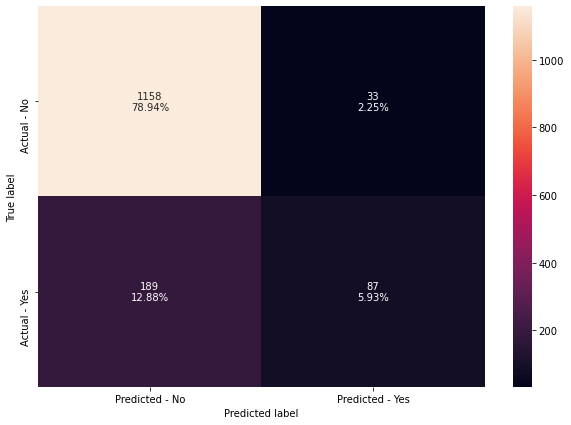

In [45]:
make_confusion_matrix(adaBoostClassifer,y_test)

Gradient Boosting

In [ ]:
gradientBoostingClass = GradientBoostingClassifier(random_state=1)
gradientBoostingClass.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gradientBoostingClass=get_metrics_score(gradientBoostingClass)

XGBoost Classifier:

In [48]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[20:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9263803680981595
Recall on training set :  0.9984472049689441
Recall on test set :  0.7065217391304348
Precision on training set :  1.0
Precision on test set :  0.8783783783783784
f1 score on test set:  0.7831325301204821


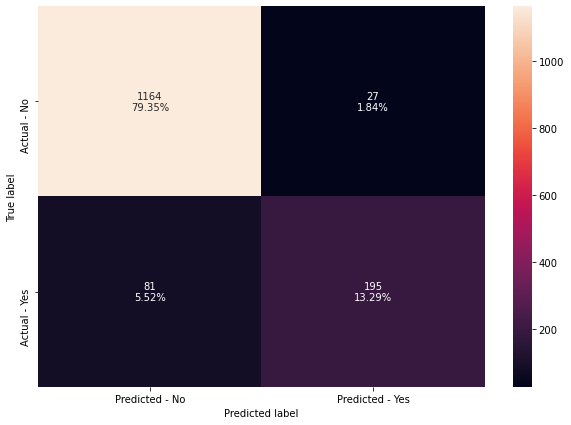

In [50]:
make_confusion_matrix(xgb,y_test)

XGBoost Classifier is the best fit. Accuracy and recall score are far better than Adaboost and Gradient Boost.

In [51]:
estimators = [
        ('rf', XGBClassifier(learning_rate=0.01)),
        ('gb', GradientBoostingClassifier(learning_rate=0.01)),
        ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
            ]

stackingclass = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stackingclass.fit(X_train, y_train)
stackingclass_score=get_metrics_score(xgb)

[20:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Stacking Classifier is another best fit. Accuracy and recall score are similar to xboost.

Hyper parameter tuning with boosing:

In [ ]:
#Adaboost classifier:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

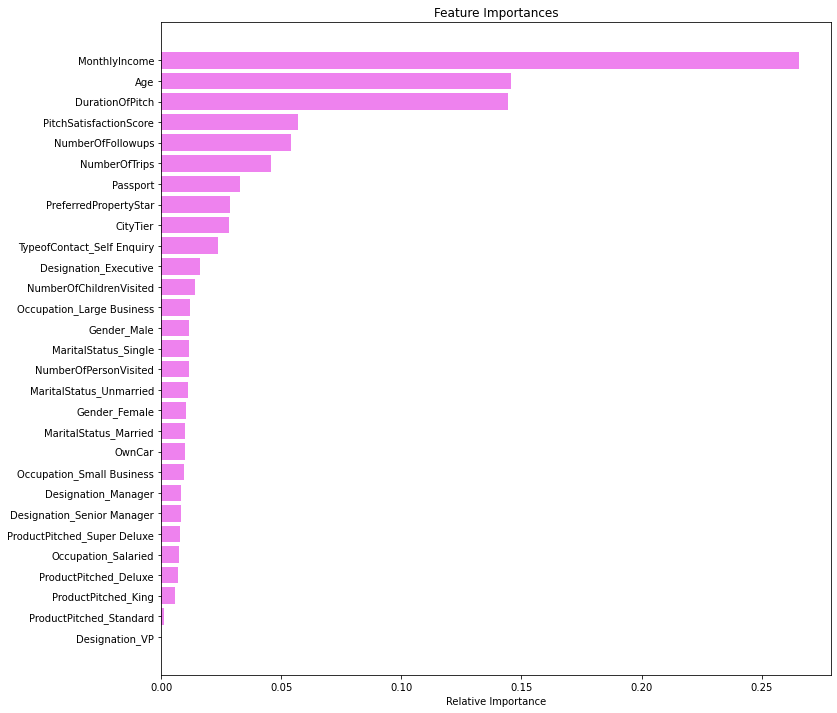

In [280]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

After further tuning Adaboost Classifier it did improve the performance slightly.
But it is still under performing XGBoost Classifier. 

With hyper tuning , XGBoost with Hyper Parameters will be the best fit model here.

# Business Recommendations:

    Based on the  predictive model (Bagging Classifier or XGBoost) Monthly income and age have become the most important features for customer to buy the new Wellness  Tourism Package product.
    Company can either invite the customers between the age of 25 and 45 to buy the product or customers who have good salary between 25000 to 45000. 
    Most probably people with passport and executives in the company have high chances of buying the package. 
    Company can create flyers and distribute to the above mentioned customers .
    Males have a done better with the previous packages so I would assume they would also be first preference. 
    In the past Basic package have been the highest packages that have been sold. I would recommend to make the new Wellness package would be closely related to Basic package and provide some promotional offers. 
     